In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
train_df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\kaggle yarışmaları\Coderspace Yaz Okulu\veri setleri\train.csv")
test_df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\kaggle yarışmaları\Coderspace Yaz Okulu\veri setleri\test.csv")

In [3]:
train_df.head()

,id,value_increased,Ability,Potential,Positions,Caps / Goals,Foot,Height,Weight,Aerial Reach,Command of Area,Communication,Eccentricity,First Touch,Handling,Kicking,One on Ones,Passing,Punching (Tendency),Reflexes,Rushing Out (Tendency),Throwing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique
0,74044,False,46.0,NaN,AMC,NaN,Right,178 CM,72 KG,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,45.0,55.0,50.0,45.0,50.0,40.0,70.0,45.0,50.0,55.0,50.0,65.0,55.0,60.0,55.0,65.0,50.0,45.0,50.0,55.0,60.0,40.0,40.0,40.0,45.0,35.0,35.0,30.0,35.0,40.0,40.0,25.0,45.0,50.0
1,83969,False,48.0,NaN,GK,NaN,Right,185 CM,82 KG,55.0,60.0,70.0,65.0,45.0,45.0,65.0,60.0,60.0,55.0,55.0,65.0,65.0,60.0,55.0,55.0,65.0,50.0,55.0,75.0,25.0,35.0,10.0,35.0,50.0,30.0,55.0,55.0,60.0,50.0,60.0,50.0,45.0,50.0,50.0,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,15.0,NaN,55.0
2,94664,False,58.0,NaN,DL DC,NaN,Left,185 CM,80 KG,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,55.0,70.0,65.0,70.0,55.0,65.0,65.0,30.0,50.0,35.0,60.0,65.0,30.0,55.0,55.0,50.0,50.0,65.0,60.0,55.0,60.0,75.0,30.0,60.0,40.0,30.0,15.0,65.0,35.0,50.0,55.0,55.0,70.0,45.0
3,46208,True,38.0,NaN,DC,NaN,Right,185 CM,74 KG,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,40.0,60.0,45.0,30.0,40.0,70.0,10.0,35.0,20.0,20.0,70.0,35.0,30.0,40.0,55.0,55.0,40.0,50.0,65.0,50.0,25.0,25.0,25.0,30.0,15.0,10.0,20.0,70.0,10.0,35.0,70.0,20.0,55.0,10.0
4,77969,False,47.0,NaN,GK,NaN,Right,193 CM,73 KG,35.0,40.0,35.0,25.0,5.0,70.0,50.0,50.0,50.0,50.0,70.0,25.0,45.0,45.0,65.0,60.0,40.0,50.0,60.0,60.0,5.0,25.0,15.0,50.0,30.0,35.0,35.0,60.0,75.0,25.0,60.0,65.0,65.0,10.0,35.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,15.0,NaN,15.0


In [4]:
test_df.head()

,id,Ability,Potential,Positions,Caps / Goals,Foot,Height,Weight,Aerial Reach,Command of Area,Communication,Eccentricity,First Touch,Handling,Kicking,One on Ones,Passing,Punching (Tendency),Reflexes,Rushing Out (Tendency),Throwing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique
0,13436,40.0,NaN,DR,NaN,Right,165 CM,60 KG,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,50.0,55.0,45.0,30.0,30.0,35.0,45.0,35.0,20.0,55.0,45.0,30.0,40.0,45.0,80.0,80.0,45.0,30.0,45.0,70.0,50.0,35.0,35.0,25.0,45.0,20.0,35.0,30.0,20.0,35.0,55.0,30.0,40.0,30.0
1,49790,42.0,NaN,DC,NaN,Right,191 CM,79 KG,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,25.0,50.0,45.0,35.0,35.0,65.0,75.0,25.0,45.0,30.0,65.0,30.0,10.0,40.0,55.0,65.0,35.0,55.0,65.0,60.0,20.0,35.0,20.0,30.0,10.0,25.0,30.0,40.0,25.0,5.0,55.0,5.0,65.0,20.0
2,73335,40.0,NaN,DM,NaN,Left,182 CM,74 KG,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,65.0,30.0,40.0,25.0,40.0,65.0,25.0,30.0,30.0,25.0,65.0,35.0,30.0,55.0,65.0,55.0,35.0,50.0,55.0,65.0,30.0,35.0,10.0,15.0,25.0,20.0,25.0,40.0,30.0,5.0,60.0,5.0,60.0,40.0
3,15949,39.0,NaN,GK,NaN,Right,187 CM,74 KG,55.0,40.0,30.0,25.0,15.0,70.0,50.0,35.0,45.0,25.0,70.0,55.0,40.0,25.0,40.0,45.0,30.0,50.0,70.0,75.0,15.0,55.0,15.0,55.0,40.0,35.0,35.0,55.0,50.0,40.0,45.0,90.0,55.0,35.0,35.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,25.0
4,26364,38.0,NaN,AMC,NaN,Left,179 CM,67 KG,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,30.0,35.0,45.0,50.0,50.0,35.0,50.0,70.0,10.0,40.0,30.0,35.0,60.0,40.0,70.0,65.0,25.0,35.0,65.0,65.0,45.0,25.0,40.0,50.0,50.0,60.0,60.0,55.0,50.0,15.0,35.0,35.0,25.0,65.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      465 non-null    int64  
 1   value_increased         465 non-null    bool   
 2   Ability                 465 non-null    float64
 3   Potential               43 non-null     float64
 4   Positions               465 non-null    object 
 5   Caps / Goals            16 non-null     object 
 6   Foot                    465 non-null    object 
 7   Height                  465 non-null    object 
 8   Weight                  465 non-null    object 
 9   Aerial Reach            32 non-null     float64
 10  Command of Area         32 non-null     float64
 11  Communication           32 non-null     float64
 12  Eccentricity            32 non-null     float64
 13  First Touch             465 non-null    float64
 14  Handling                32 non-null     fl

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      310 non-null    int64  
 1   Ability                 310 non-null    float64
 2   Potential               35 non-null     float64
 3   Positions               310 non-null    object 
 4   Caps / Goals            16 non-null     object 
 5   Foot                    310 non-null    object 
 6   Height                  310 non-null    object 
 7   Weight                  310 non-null    object 
 8   Aerial Reach            12 non-null     float64
 9   Command of Area         12 non-null     float64
 10  Communication           12 non-null     float64
 11  Eccentricity            12 non-null     float64
 12  First Touch             310 non-null    float64
 13  Handling                12 non-null     float64
 14  Kicking                 12 non-null     fl

In [7]:
train_df.shape

(465, 56)

In [8]:
train_df.isnull().sum()

id                          0
value_increased             0
Ability                     0
Potential                 422
Positions                   0
Caps / Goals              449
Foot                        0
Height                      0
Weight                      0
Aerial Reach              433
Command of Area           433
Communication             433
Eccentricity              433
First Touch                 0
Handling                  433
Kicking                   433
One on Ones               433
Passing                     0
Punching (Tendency)       433
Reflexes                  433
Rushing Out (Tendency)    433
Throwing                  433
Aggression                  0
Anticipation                0
Bravery                     0
Composure                   0
Concentration               0
Decisions                   0
Determination               0
Flair                       0
Leadership                  0
Off the Ball                0
Positioning                 0
Teamwork  

In [9]:
test_df.shape

(310, 55)

In [10]:
test_df.isnull().sum()

id                          0
Ability                     0
Potential                 275
Positions                   0
Caps / Goals              294
Foot                        0
Height                      0
Weight                      0
Aerial Reach              298
Command of Area           298
Communication             298
Eccentricity              298
First Touch                 0
Handling                  298
Kicking                   298
One on Ones               298
Passing                     0
Punching (Tendency)       298
Reflexes                  298
Rushing Out (Tendency)    298
Throwing                  298
Aggression                  0
Anticipation                0
Bravery                     0
Composure                   0
Concentration               0
Decisions                   0
Determination               0
Flair                       0
Leadership                  0
Off the Ball                0
Positioning                 0
Teamwork                    0
Vision    

In [11]:
## Eksik Değer Analizi

In [12]:
missing_threshold = 0.3  
for df in [train_df, test_df]:
    missing_ratio = df.isnull().mean()  
    cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index 
    
    df.drop(cols_to_drop, axis=1, inplace=True)

In [13]:
num_cols = [col for col in train_df.columns if train_df[col].dtype in ["int64", "float64"]]
cat_cols = [col for col in train_df.columns if str(train_df[col].dtype) in ["category", "object", "bool"]]

In [14]:
def cat_summary(dataframe, col_names, plot=False):
    for col_name in col_names:
        summary_df = pd.DataFrame({
            col_name: dataframe[col_name].value_counts(),
            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)
        })
        print(summary_df)
        print("_______________________________________________________________")
        
        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.title(f'Distribution of {col_name}')
            plt.show()

cat_summary(train_df, cat_cols, False)

                 value_increased      Ratio
value_increased                            
False                        395  84.946237
True                          70  15.053763
_______________________________________________________________
               Positions      Ratio
Positions                          
DC                    69  14.838710
ST                    59  12.688172
MC                    42   9.032258
GK                    32   6.881720
AMC                   28   6.021505
MC AMC                20   4.301075
DM MC                 19   4.086022
DL                    18   3.870968
DM                    18   3.870968
DR                    17   3.655914
AML                   14   3.010753
AMR                   13   2.795699
AMR AML               12   2.580645
DR WBR                11   2.365591
AML ST                 9   1.935484
DL WBL                 9   1.935484
AMC ST                 7   1.505376
AMR AMC                6   1.290323
MR AMR                 5   1.075269
AML 

count      465.000000
mean     55474.206452
std      26644.428530
min      10301.000000
5%       14226.200000
10%      18614.600000
30%      36160.000000
40%      45856.200000
50%      55236.000000
60%      65414.000000
70%      72532.000000
80%      82173.000000
90%      93641.400000
100%     99912.000000
max      99912.000000
Name: id, dtype: float64


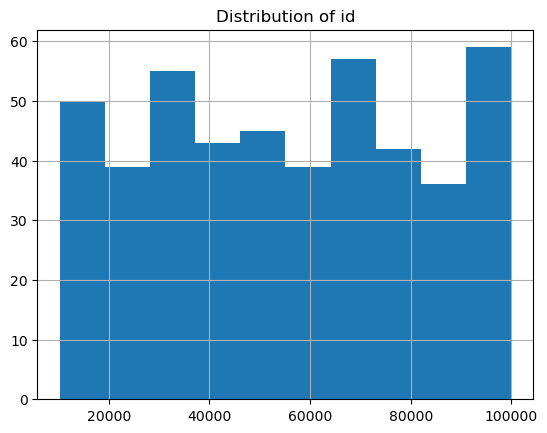

count    465.000000
mean      44.724731
std       16.136324
min        0.000000
5%         0.000000
10%       29.000000
30%       41.000000
40%       44.000000
50%       48.000000
60%       50.000000
70%       53.000000
80%       57.000000
90%       60.000000
100%      80.000000
max       80.000000
Name: Ability, dtype: float64


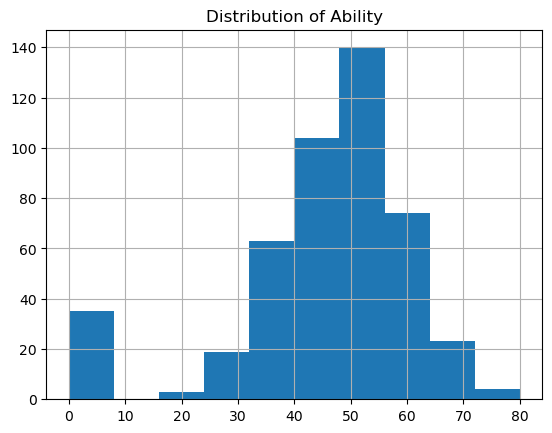

count    465.000000
mean      54.784946
std       14.083227
min        5.000000
5%        30.000000
10%       35.000000
30%       50.000000
40%       55.000000
50%       55.000000
60%       60.000000
70%       64.000000
80%       65.000000
90%       70.000000
100%      85.000000
max       85.000000
Name: First Touch, dtype: float64


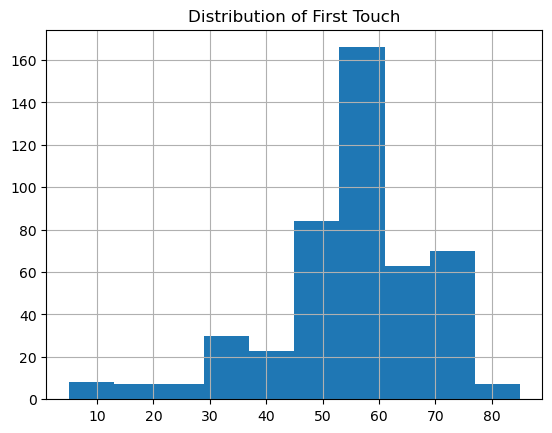

count    465.000000
mean      53.032258
std       11.828928
min       15.000000
5%        35.000000
10%       35.000000
30%       50.000000
40%       50.000000
50%       55.000000
60%       60.000000
70%       60.000000
80%       65.000000
90%       65.000000
100%      90.000000
max       90.000000
Name: Passing, dtype: float64


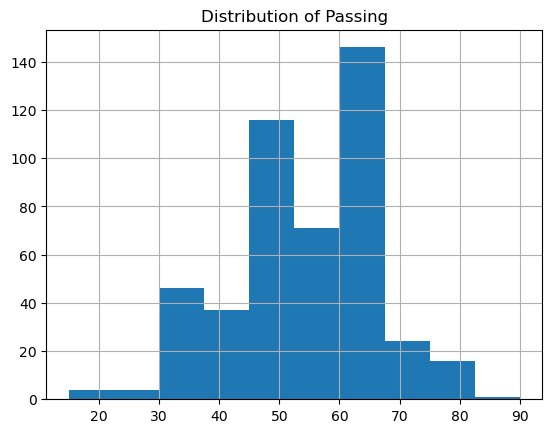

count    465.000000
mean      50.053763
std       14.531005
min       15.000000
5%        25.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      80.000000
max       80.000000
Name: Aggression, dtype: float64


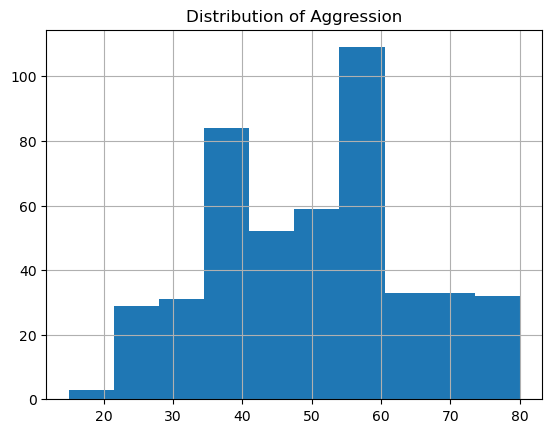

count    465.000000
mean      49.806452
std       13.121004
min       15.000000
5%        25.000000
10%       30.000000
30%       45.000000
40%       50.000000
50%       50.000000
60%       55.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      85.000000
max       85.000000
Name: Anticipation, dtype: float64


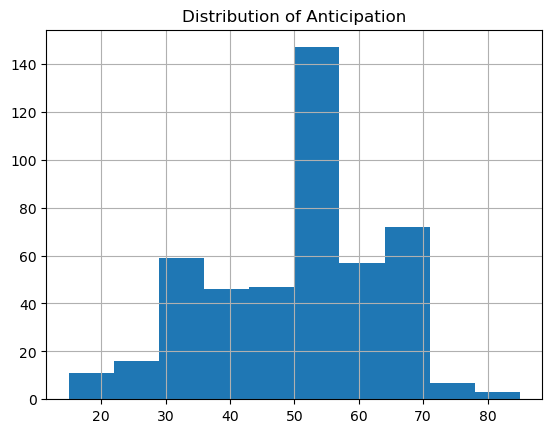

count    465.000000
mean      48.967742
std       15.054106
min        5.000000
5%        20.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       60.000000
90%       70.000000
100%      90.000000
max       90.000000
Name: Bravery, dtype: float64


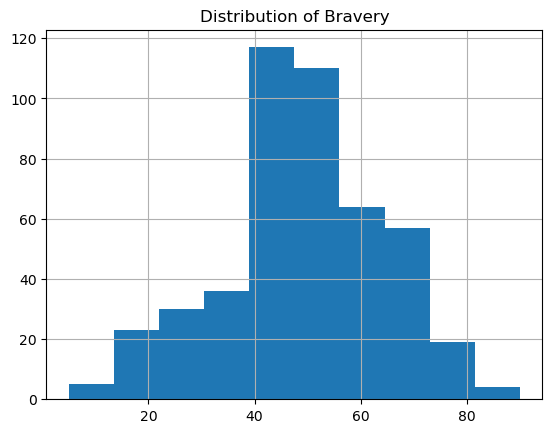

count    465.000000
mean      47.731183
std       13.067415
min       10.000000
5%        25.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       50.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Composure, dtype: float64


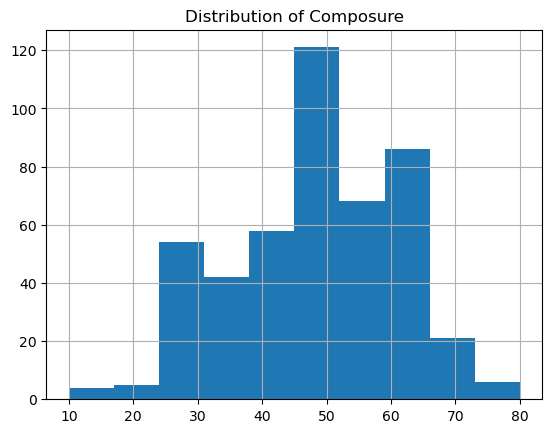

count    465.000000
mean      46.129032
std       12.584393
min        5.000000
5%        21.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       45.000000
60%       50.000000
70%       55.000000
80%       55.000000
90%       60.000000
100%      75.000000
max       75.000000
Name: Concentration, dtype: float64


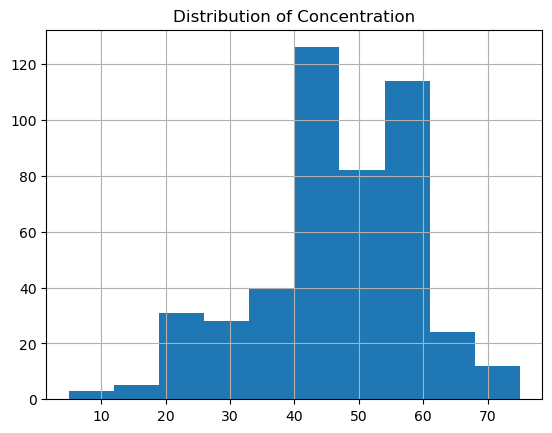

count    465.000000
mean      54.225806
std       11.594002
min       15.000000
5%        35.000000
10%       40.000000
30%       50.000000
40%       50.000000
50%       55.000000
60%       60.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      80.000000
max       80.000000
Name: Decisions, dtype: float64


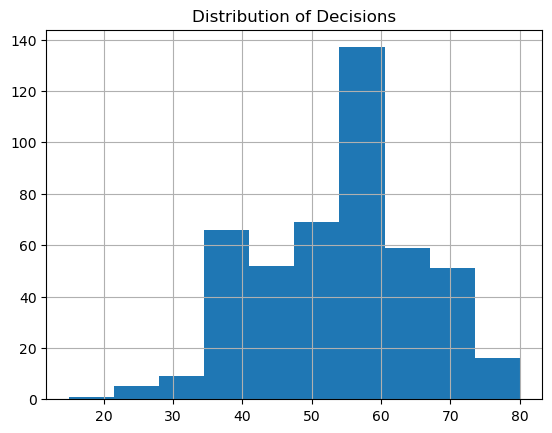

count    465.000000
mean      61.043011
std       18.291765
min       10.000000
5%        25.000000
10%       32.000000
30%       55.000000
40%       60.000000
50%       65.000000
60%       70.000000
70%       70.000000
80%       75.000000
90%       80.000000
100%      99.000000
max       99.000000
Name: Determination, dtype: float64


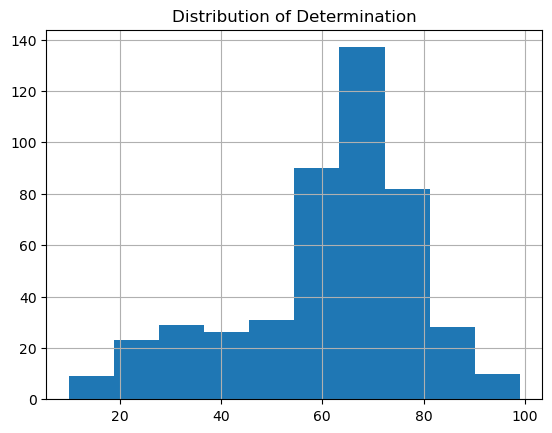

count    465.000000
mean      46.922581
std       19.472970
min        5.000000
5%        15.000000
10%       25.000000
30%       35.000000
40%       40.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      99.000000
max       99.000000
Name: Flair, dtype: float64


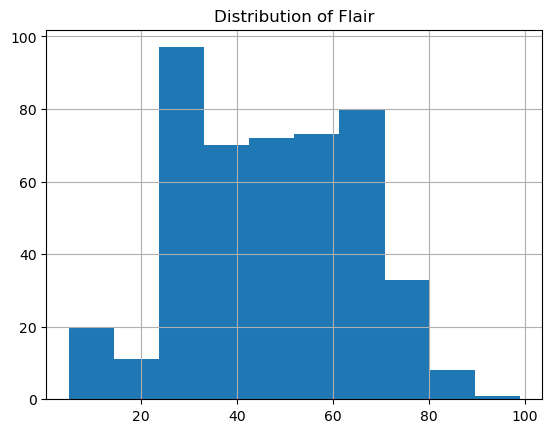

count    465.000000
mean      38.817204
std       15.886143
min        5.000000
5%        10.000000
10%       20.000000
30%       30.000000
40%       35.000000
50%       40.000000
60%       45.000000
70%       50.000000
80%       55.000000
90%       60.000000
100%      75.000000
max       75.000000
Name: Leadership, dtype: float64


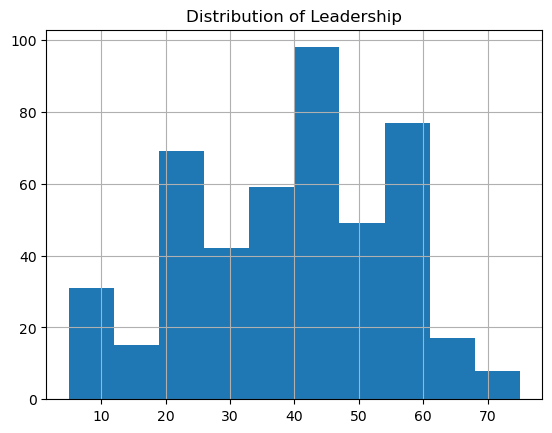

count    465.000000
mean      47.086022
std       17.169073
min        5.000000
5%        15.000000
10%       25.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       60.000000
90%       65.000000
100%      90.000000
max       90.000000
Name: Off the Ball, dtype: float64


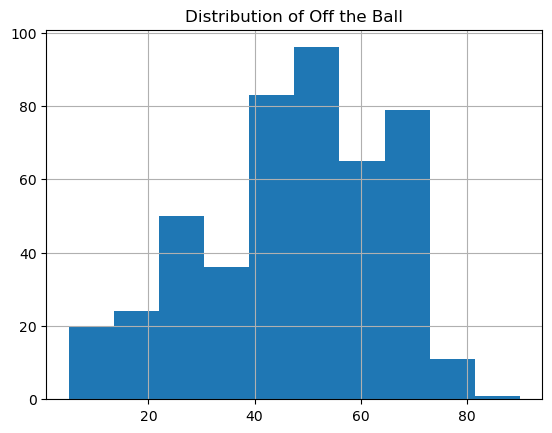

count    465.000000
mean      43.236559
std       14.644051
min        5.000000
5%        20.000000
10%       25.000000
30%       35.000000
40%       40.000000
50%       45.000000
60%       50.000000
70%       50.000000
80%       60.000000
90%       65.000000
100%      75.000000
max       75.000000
Name: Positioning, dtype: float64


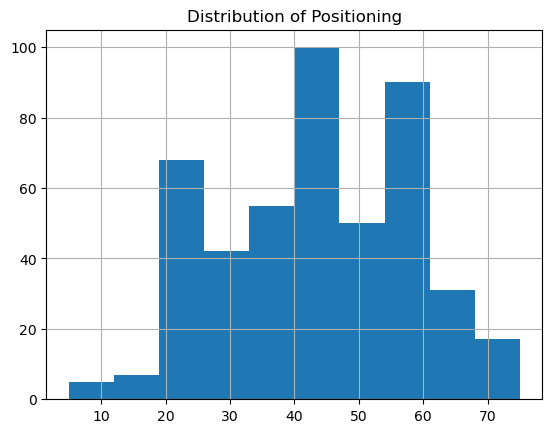

count    465.000000
mean      49.892473
std       12.529674
min       15.000000
5%        30.000000
10%       35.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       60.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Teamwork, dtype: float64


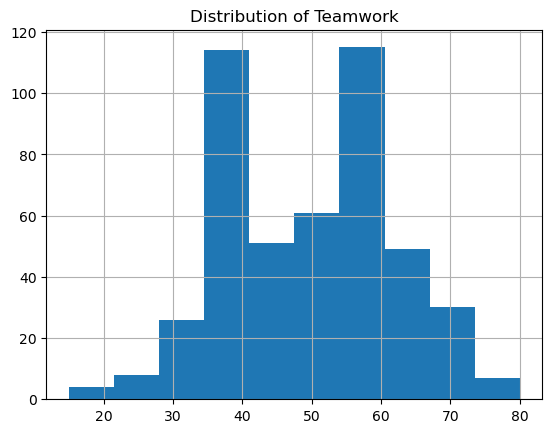

count    465.000000
mean      47.537634
std       14.724890
min        5.000000
5%        20.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       45.000000
60%       50.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      85.000000
max       85.000000
Name: Vision, dtype: float64


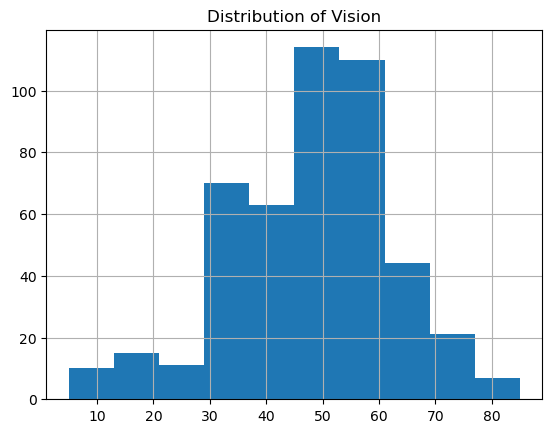

count    465.000000
mean      54.086022
std       11.997356
min       20.000000
5%        35.000000
10%       35.000000
30%       45.000000
40%       50.000000
50%       55.000000
60%       60.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      85.000000
max       85.000000
Name: Work Rate, dtype: float64


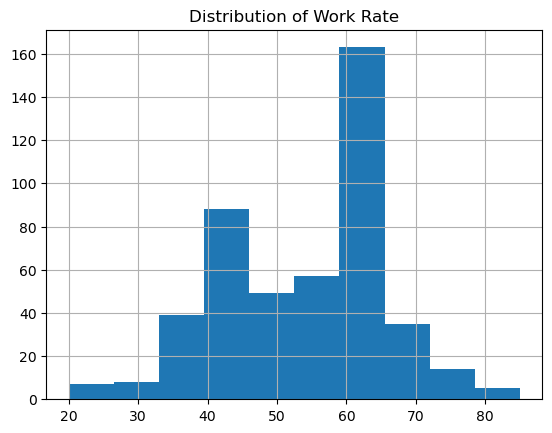

count    465.000000
mean      62.935484
std       10.141038
min       30.000000
5%        45.000000
10%       50.000000
30%       60.000000
40%       60.000000
50%       65.000000
60%       65.000000
70%       70.000000
80%       70.000000
90%       75.000000
100%      90.000000
max       90.000000
Name: Acceleration, dtype: float64


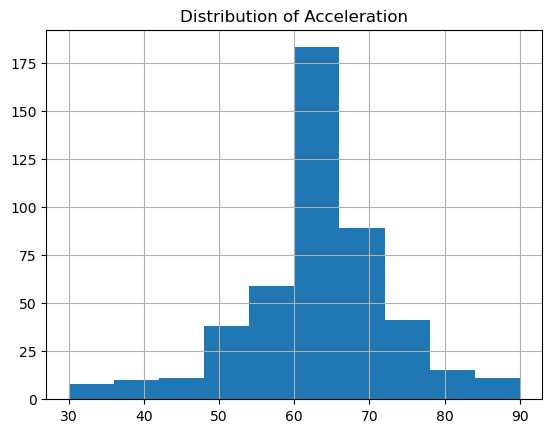

count    465.000000
mean      59.709677
std        9.780545
min       25.000000
5%        45.000000
10%       45.000000
30%       55.000000
40%       60.000000
50%       60.000000
60%       65.000000
70%       65.000000
80%       70.000000
90%       70.000000
100%      90.000000
max       90.000000
Name: Agility, dtype: float64


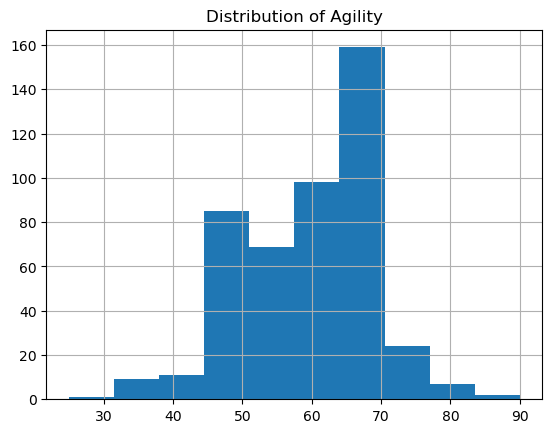

count    465.000000
mean      48.268817
std       15.123871
min        5.000000
5%        20.000000
10%       30.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       60.000000
90%       70.000000
100%      85.000000
max       85.000000
Name: Balance, dtype: float64


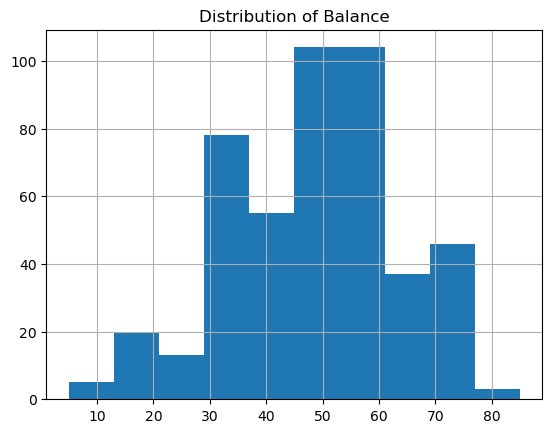

count    465.000000
mean      49.107527
std       17.361187
min        5.000000
5%        20.000000
10%       25.000000
30%       40.000000
40%       45.000000
50%       50.000000
60%       55.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      90.000000
max       90.000000
Name: Jumping Reach, dtype: float64


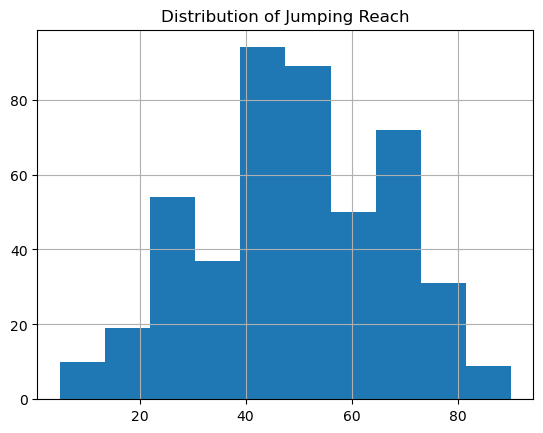

count    465.000000
mean      61.666667
std       12.446726
min       25.000000
5%        35.000000
10%       45.000000
30%       60.000000
40%       60.000000
50%       65.000000
60%       65.000000
70%       70.000000
80%       70.000000
90%       75.000000
100%      90.000000
max       90.000000
Name: Natural Fitness, dtype: float64


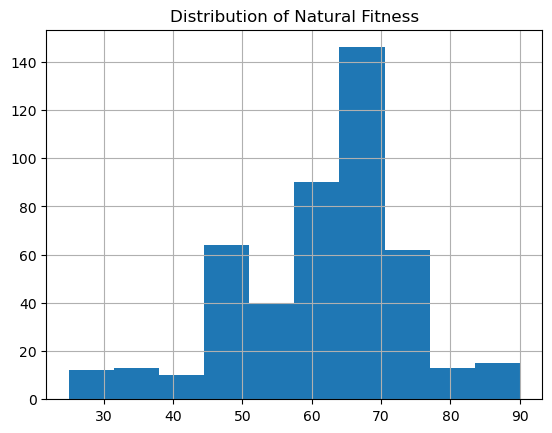

count    465.000000
mean      61.483871
std        9.505684
min       30.000000
5%        45.000000
10%       50.000000
30%       55.000000
40%       60.000000
50%       65.000000
60%       65.000000
70%       65.000000
80%       70.000000
90%       70.000000
100%      90.000000
max       90.000000
Name: Pace, dtype: float64


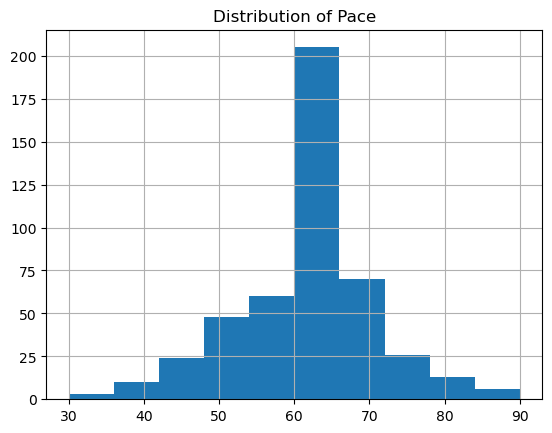

count    465.000000
mean      50.258065
std       14.846124
min        5.000000
5%        25.000000
10%       30.000000
30%       45.000000
40%       50.000000
50%       55.000000
60%       55.000000
70%       60.000000
80%       65.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Stamina, dtype: float64


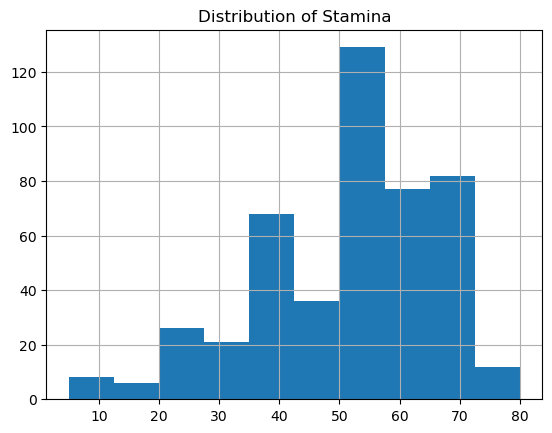

count    465.000000
mean      43.182796
std       16.601923
min        5.000000
5%        15.000000
10%       25.000000
30%       35.000000
40%       40.000000
50%       40.000000
60%       45.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Strength, dtype: float64


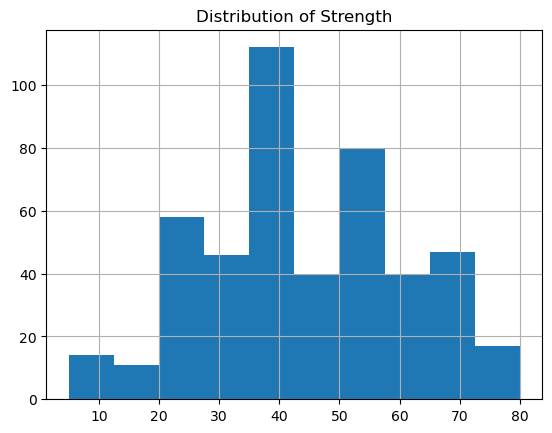

count    433.000000
mean      35.207852
std       13.117286
min        5.000000
5%        15.000000
10%       20.000000
30%       30.000000
40%       30.000000
50%       35.000000
60%       35.000000
70%       40.000000
80%       45.000000
90%       54.000000
100%      70.000000
max       70.000000
Name: Corners, dtype: float64


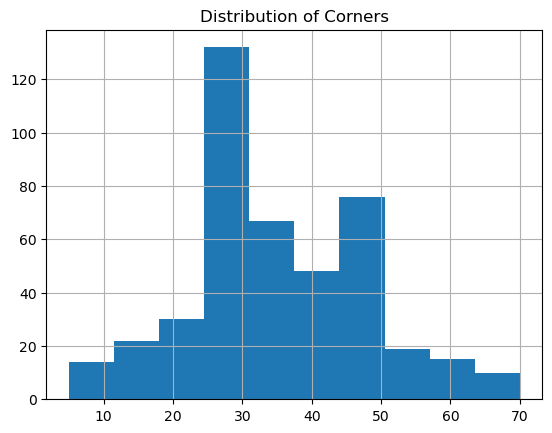

count    433.000000
mean      40.727483
std       14.801608
min        5.000000
5%        15.000000
10%       20.000000
30%       35.000000
40%       39.000000
50%       40.000000
60%       45.000000
70%       50.000000
80%       55.000000
90%       60.000000
100%      70.000000
max       70.000000
Name: Crossing, dtype: float64


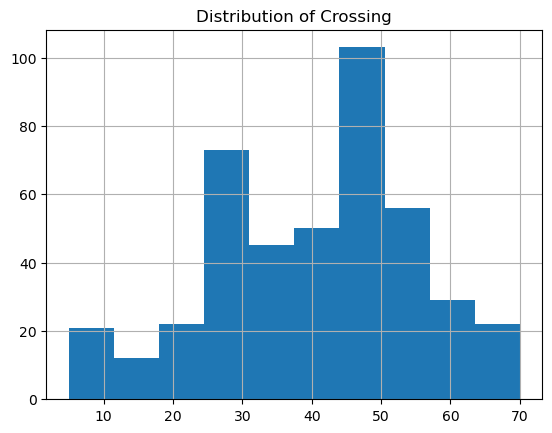

count    433.000000
mean      49.953811
std       17.149201
min        5.000000
5%        15.000000
10%       25.000000
30%       40.000000
40%       45.000000
50%       55.000000
60%       60.000000
70%       60.000000
80%       65.000000
90%       70.000000
100%      80.000000
max       80.000000
Name: Dribbling, dtype: float64


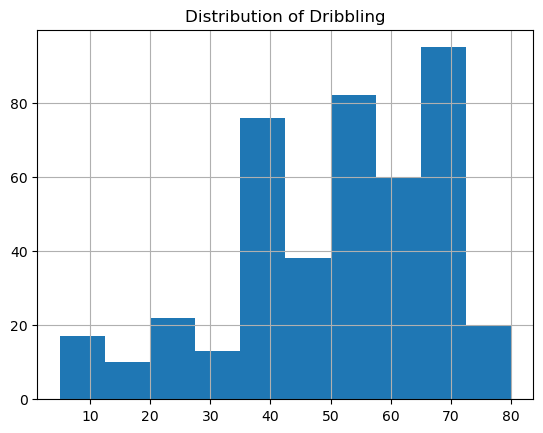

count    433.000000
mean      42.263279
std       16.789960
min        5.000000
5%        15.000000
10%       20.000000
30%       35.000000
40%       35.000000
50%       40.000000
60%       46.000000
70%       50.000000
80%       60.000000
90%       65.000000
100%      90.000000
max       90.000000
Name: Finishing, dtype: float64


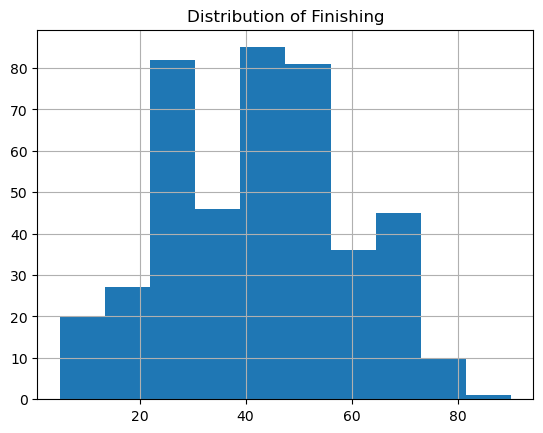

count    465.000000
mean      34.634409
std       14.646543
min        5.000000
5%         5.000000
10%       15.000000
30%       30.000000
40%       30.000000
50%       35.000000
60%       40.000000
70%       40.000000
80%       45.000000
90%       55.000000
100%      75.000000
max       75.000000
Name: Free Kick Taking, dtype: float64


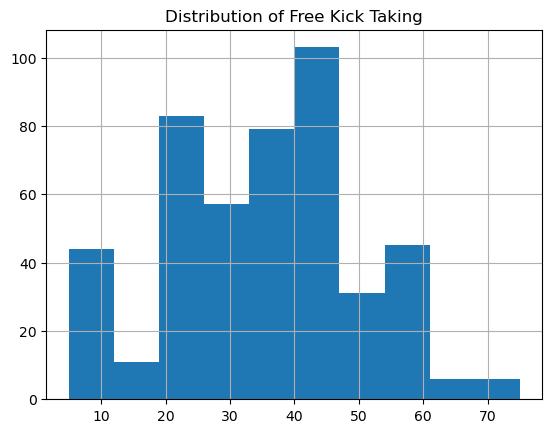

count    433.000000
mean      45.219400
std       14.357712
min        5.000000
5%        25.000000
10%       30.000000
30%       35.000000
40%       40.000000
50%       45.000000
60%       50.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Heading, dtype: float64


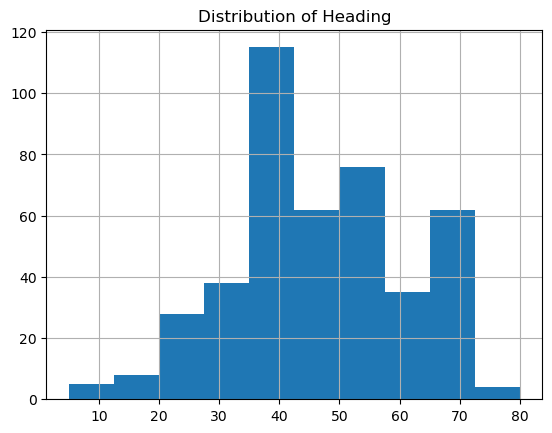

count    433.000000
mean      40.484988
std       13.931724
min        5.000000
5%        18.000000
10%       20.000000
30%       35.000000
40%       35.000000
50%       40.000000
60%       45.000000
70%       50.000000
80%       55.000000
90%       60.000000
100%      75.000000
max       75.000000
Name: Long Shots, dtype: float64


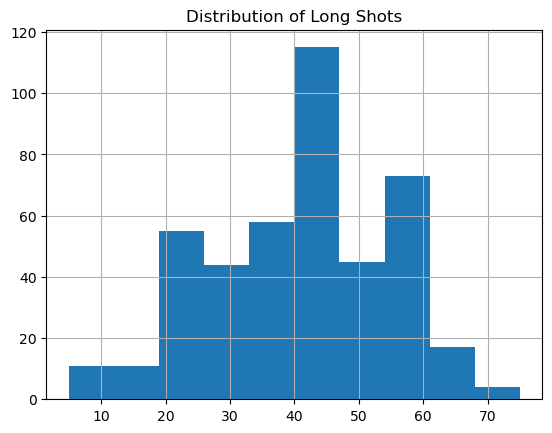

count    433.000000
mean      28.556582
std       15.345018
min        5.000000
5%         5.000000
10%       10.000000
30%       20.000000
40%       25.000000
50%       30.000000
60%       30.000000
70%       35.000000
80%       40.000000
90%       50.000000
100%      75.000000
max       75.000000
Name: Long Throws, dtype: float64


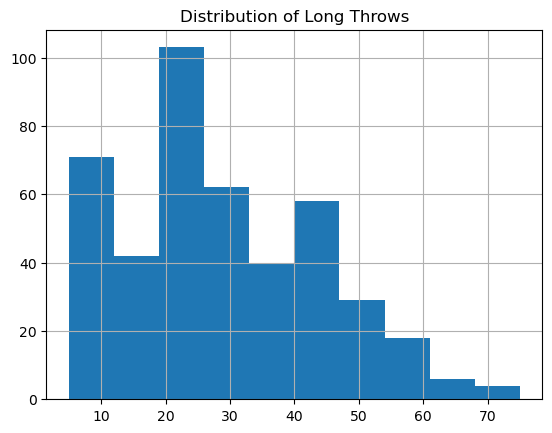

count    433.000000
mean      40.011547
std       16.296226
min        5.000000
5%        15.000000
10%       20.000000
30%       30.000000
40%       35.000000
50%       40.000000
60%       45.000000
70%       50.000000
80%       55.000000
90%       65.000000
100%      75.000000
max       75.000000
Name: Marking, dtype: float64


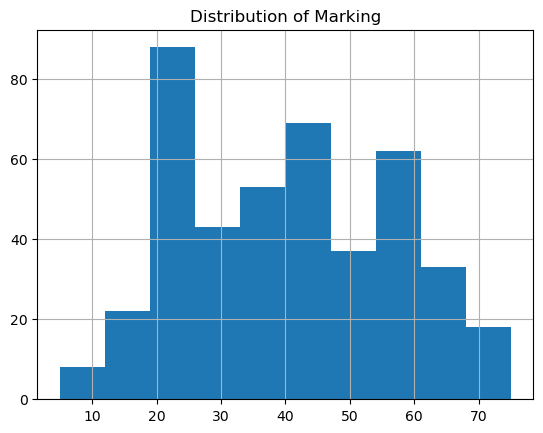

count    465.000000
mean      30.935484
std       17.010903
min        5.000000
5%         5.000000
10%       10.000000
30%       20.000000
40%       25.000000
50%       30.000000
60%       35.000000
70%       40.000000
80%       45.000000
90%       55.000000
100%      85.000000
max       85.000000
Name: Penalty Taking, dtype: float64


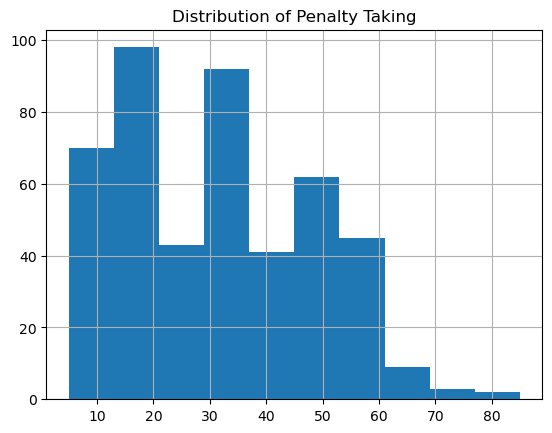

count    433.000000
mean      44.087760
std       17.665531
min        5.000000
5%        15.000000
10%       20.000000
30%       35.000000
40%       39.000000
50%       45.000000
60%       50.000000
70%       55.000000
80%       60.000000
90%       65.000000
100%      80.000000
max       80.000000
Name: Tackling, dtype: float64


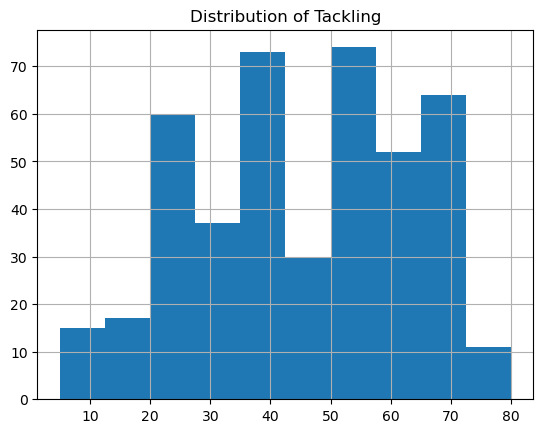

count    465.000000
mean      54.225806
std       15.180047
min        5.000000
5%        25.000000
10%       35.000000
30%       50.000000
40%       55.000000
50%       55.000000
60%       60.000000
70%       65.000000
80%       65.000000
90%       70.000000
100%      85.000000
max       85.000000
Name: Technique, dtype: float64


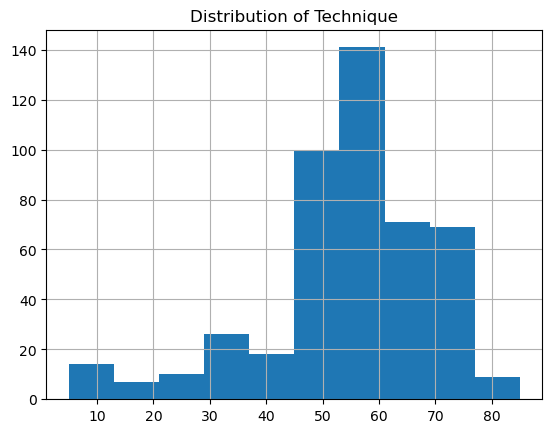

In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.title(f'Distribution of {numerical_col}')
        plt.show()

for col in num_cols:
    num_summary(train_df, col, True)


In [16]:
def knn_impute(df, n_neighbors=5):
    df_reduced = df.copy()
    for col in df_reduced.select_dtypes(include='object').columns:
        df_reduced[col] = df_reduced[col].astype('category').cat.codes
    
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_reduced), columns=df_reduced.columns)

    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df[col]
    
    df_imputed = df_imputed[df.columns]

    return df_imputed


df_train_imputed = knn_impute(train_df, n_neighbors=5)
df_test_imputed = knn_impute(test_df, n_neighbors=5)


In [17]:
train_df.isnull().any()
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(train_df)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_summary)


             Missing Values  Percentage
Corners                  32     6.88172
Crossing                 32     6.88172
Dribbling                32     6.88172
Finishing                32     6.88172
Heading                  32     6.88172
Long Shots               32     6.88172
Long Throws              32     6.88172
Marking                  32     6.88172
Tackling                 32     6.88172


In [18]:
for col in cat_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  


for col in num_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mean())  

In [19]:
for col in cat_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])  

for col in num_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mean())  

In [20]:
for df in [train_df, test_df]:
    df['Height'] = df['Height'].str.replace(' CM', '', regex=False)  
    df['Height'] = df['Height'].astype(int)  


In [21]:
for df in [train_df, test_df]:
    df['Weight'] = df['Weight'].str.replace(' KG', '', regex=False)  
    df['Weight'] = df['Weight'].astype(int)  

In [22]:
for df in [train_df, test_df]:
    df['Foot'] = df['Foot'].map({'Right': 1, 'Left': 0})

In [23]:
train_df["Positions"].value_counts()

Positions
DC               69
ST               59
MC               42
GK               32
AMC              28
MC AMC           20
DM MC            19
DL               18
DM               18
DR               17
AML              14
AMR              13
AMR AML          12
DR WBR           11
AML ST            9
DL WBL            9
AMC ST            7
AMR AMC           6
MR AMR            5
AML AMC           5
DL DC             5
ML AML            4
DL DC WBL         3
ML AML ST         3
AMR AML ST        3
WBR MR AMR        2
MR ML AMR AML     2
DC DM             2
WBL ML            2
AML AMC ST        2
DR DL             2
MC AML AMC        2
MR                1
DR DC WBR         1
WBL AMR AML       1
DL DC DM          1
DR DC             1
AMR AML AMC       1
ML AMR AML ST     1
MC ML             1
DL AML            1
DR MC             1
WBR MR            1
DL DM MC          1
DC AMC            1
ML                1
DL WBL ML         1
DM MC AMC         1
MR AMR AML        1
MC MR     

In [24]:
train_positions = train_df['Positions'].str.get_dummies(sep=' ')
test_positions = test_df['Positions'].str.get_dummies(sep=' ')

train_df = pd.concat([train_df, train_positions], axis=1)
test_df = pd.concat([test_df, test_positions], axis=1)


train_df.drop(columns=['Positions'], inplace=True)
test_df.drop(columns=['Positions'], inplace=True)

In [25]:
train_df.head()

,id,value_increased,Ability,Foot,Height,Weight,First Touch,Passing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique,AMC,AML,AMR,DC,DL,DM,DR,GK,MC,ML,MR,ST,WBL,WBR
0,74044,False,46.0,1,178,72,55.0,55.0,45.0,55.0,50.0,45.0,50.0,40.0,70.0,45.0,50.0,55.0,50.0,65.0,55.0,60.0,55.0,65.0,50.0,45.0,50.0,55.0,60.0,40.0,40.000000,40.000000,45.000000,35.000000,35.0,30.0000,35.000000,40.000000,40.000000,25.0,45.00000,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,83969,False,48.0,1,185,82,45.0,60.0,60.0,55.0,55.0,65.0,50.0,55.0,75.0,25.0,35.0,10.0,35.0,50.0,30.0,55.0,55.0,60.0,50.0,60.0,50.0,45.0,50.0,50.0,35.207852,40.727483,49.953811,42.263279,35.0,45.2194,40.484988,28.556582,40.011547,15.0,44.08776,55.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,94664,False,58.0,0,185,80,55.0,60.0,55.0,70.0,65.0,70.0,55.0,65.0,65.0,30.0,50.0,35.0,60.0,65.0,30.0,55.0,55.0,50.0,50.0,65.0,60.0,55.0,60.0,75.0,30.000000,60.000000,40.000000,30.000000,15.0,65.0000,35.000000,50.000000,55.000000,55.0,70.00000,45.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,46208,True,38.0,1,185,74,35.0,30.0,40.0,60.0,45.0,30.0,40.0,70.0,10.0,35.0,20.0,20.0,70.0,35.0,30.0,40.0,55.0,55.0,40.0,50.0,65.0,50.0,25.0,25.0,25.000000,30.000000,15.000000,10.000000,20.0,70.0000,10.000000,35.000000,70.000000,20.0,55.00000,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,77969,False,47.0,1,193,73,5.0,50.0,45.0,65.0,60.0,40.0,50.0,60.0,60.0,5.0,25.0,15.0,50.0,30.0,35.0,35.0,60.0,75.0,25.0,60.0,65.0,65.0,10.0,35.0,35.207852,40.727483,49.953811,42.263279,40.0,45.2194,40.484988,28.556582,40.011547,15.0,44.08776,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
test_df.head()

,id,Ability,Foot,Height,Weight,First Touch,Passing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique,AMC,AML,AMR,DC,DL,DM,DR,GK,MC,ML,MR,ST,WBL,WBR
0,13436,40.0,1.0,165,60,35.0,40.0,50.0,55.0,45.0,30.0,30.0,35.0,45.0,35.0,20.0,55.0,45.0,30.0,40.0,45.0,80.0,80.0,45.0,30.0,45.0,70.0,50.0,35.0,35.000000,25.000000,45.000000,20.000000,35.0,30.00000,20.000000,35.000000,55.000000,30.0,40.000000,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,49790,42.0,1.0,191,79,40.0,35.0,25.0,50.0,45.0,35.0,35.0,65.0,75.0,25.0,45.0,30.0,65.0,30.0,10.0,40.0,55.0,65.0,35.0,55.0,65.0,60.0,20.0,35.0,20.000000,30.000000,10.000000,25.000000,30.0,40.00000,25.000000,5.000000,55.000000,5.0,65.000000,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,73335,40.0,0.0,182,74,45.0,55.0,65.0,30.0,40.0,25.0,40.0,65.0,25.0,30.0,30.0,25.0,65.0,35.0,30.0,55.0,65.0,55.0,35.0,50.0,55.0,65.0,30.0,35.0,10.000000,15.000000,25.000000,20.000000,25.0,40.00000,30.000000,5.000000,60.000000,5.0,60.000000,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,15949,39.0,1.0,187,74,15.0,45.0,25.0,40.0,45.0,30.0,50.0,70.0,75.0,15.0,55.0,15.0,55.0,40.0,35.0,35.0,55.0,50.0,40.0,45.0,90.0,55.0,35.0,35.0,36.073826,41.744966,49.949664,43.607383,10.0,45.11745,42.063758,26.711409,40.654362,10.0,43.942953,25.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,26364,38.0,0.0,179,67,65.0,50.0,30.0,35.0,45.0,50.0,50.0,35.0,50.0,70.0,10.0,40.0,30.0,35.0,60.0,40.0,70.0,65.0,25.0,35.0,65.0,65.0,45.0,25.0,40.000000,50.000000,50.000000,60.000000,60.0,55.00000,50.000000,15.000000,35.000000,35.0,25.000000,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
missing_data_after = train_df.isnull().sum()
print(missing_data_after[missing_data_after > 0])

Series([], dtype: int64)


In [28]:
missing_data_after = test_df.isnull().sum()
print(missing_data_after[missing_data_after > 0])

Foot    1
dtype: int64


In [29]:
missing_foot_rows = test_df[test_df['Foot'].isnull()]
test_df['Foot'].fillna(1, inplace=True)

C:\Users\Emirhan Tozlu\AppData\Local\Temp\ipykernel_12284\3514024938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Foot'].fillna(1, inplace=True)


In [30]:
test_df["Foot"].isnull().any()

False

In [31]:
train_df.head()

,id,value_increased,Ability,Foot,Height,Weight,First Touch,Passing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique,AMC,AML,AMR,DC,DL,DM,DR,GK,MC,ML,MR,ST,WBL,WBR
0,74044,False,46.0,1,178,72,55.0,55.0,45.0,55.0,50.0,45.0,50.0,40.0,70.0,45.0,50.0,55.0,50.0,65.0,55.0,60.0,55.0,65.0,50.0,45.0,50.0,55.0,60.0,40.0,40.000000,40.000000,45.000000,35.000000,35.0,30.0000,35.000000,40.000000,40.000000,25.0,45.00000,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,83969,False,48.0,1,185,82,45.0,60.0,60.0,55.0,55.0,65.0,50.0,55.0,75.0,25.0,35.0,10.0,35.0,50.0,30.0,55.0,55.0,60.0,50.0,60.0,50.0,45.0,50.0,50.0,35.207852,40.727483,49.953811,42.263279,35.0,45.2194,40.484988,28.556582,40.011547,15.0,44.08776,55.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,94664,False,58.0,0,185,80,55.0,60.0,55.0,70.0,65.0,70.0,55.0,65.0,65.0,30.0,50.0,35.0,60.0,65.0,30.0,55.0,55.0,50.0,50.0,65.0,60.0,55.0,60.0,75.0,30.000000,60.000000,40.000000,30.000000,15.0,65.0000,35.000000,50.000000,55.000000,55.0,70.00000,45.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,46208,True,38.0,1,185,74,35.0,30.0,40.0,60.0,45.0,30.0,40.0,70.0,10.0,35.0,20.0,20.0,70.0,35.0,30.0,40.0,55.0,55.0,40.0,50.0,65.0,50.0,25.0,25.0,25.000000,30.000000,15.000000,10.000000,20.0,70.0000,10.000000,35.000000,70.000000,20.0,55.00000,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,77969,False,47.0,1,193,73,5.0,50.0,45.0,65.0,60.0,40.0,50.0,60.0,60.0,5.0,25.0,15.0,50.0,30.0,35.0,35.0,60.0,75.0,25.0,60.0,65.0,65.0,10.0,35.0,35.207852,40.727483,49.953811,42.263279,40.0,45.2194,40.484988,28.556582,40.011547,15.0,44.08776,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
test_df.head()

,id,Ability,Foot,Height,Weight,First Touch,Passing,Aggression,Anticipation,Bravery,Composure,Concentration,Decisions,Determination,Flair,Leadership,Off the Ball,Positioning,Teamwork,Vision,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Corners,Crossing,Dribbling,Finishing,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Penalty Taking,Tackling,Technique,AMC,AML,AMR,DC,DL,DM,DR,GK,MC,ML,MR,ST,WBL,WBR
0,13436,40.0,1.0,165,60,35.0,40.0,50.0,55.0,45.0,30.0,30.0,35.0,45.0,35.0,20.0,55.0,45.0,30.0,40.0,45.0,80.0,80.0,45.0,30.0,45.0,70.0,50.0,35.0,35.000000,25.000000,45.000000,20.000000,35.0,30.00000,20.000000,35.000000,55.000000,30.0,40.000000,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,49790,42.0,1.0,191,79,40.0,35.0,25.0,50.0,45.0,35.0,35.0,65.0,75.0,25.0,45.0,30.0,65.0,30.0,10.0,40.0,55.0,65.0,35.0,55.0,65.0,60.0,20.0,35.0,20.000000,30.000000,10.000000,25.000000,30.0,40.00000,25.000000,5.000000,55.000000,5.0,65.000000,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,73335,40.0,0.0,182,74,45.0,55.0,65.0,30.0,40.0,25.0,40.0,65.0,25.0,30.0,30.0,25.0,65.0,35.0,30.0,55.0,65.0,55.0,35.0,50.0,55.0,65.0,30.0,35.0,10.000000,15.000000,25.000000,20.000000,25.0,40.00000,30.000000,5.000000,60.000000,5.0,60.000000,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,15949,39.0,1.0,187,74,15.0,45.0,25.0,40.0,45.0,30.0,50.0,70.0,75.0,15.0,55.0,15.0,55.0,40.0,35.0,35.0,55.0,50.0,40.0,45.0,90.0,55.0,35.0,35.0,36.073826,41.744966,49.949664,43.607383,10.0,45.11745,42.063758,26.711409,40.654362,10.0,43.942953,25.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,26364,38.0,0.0,179,67,65.0,50.0,30.0,35.0,45.0,50.0,50.0,35.0,50.0,70.0,10.0,40.0,30.0,35.0,60.0,40.0,70.0,65.0,25.0,35.0,65.0,65.0,45.0,25.0,40.000000,50.000000,50.000000,60.000000,60.0,55.00000,50.000000,15.000000,35.000000,35.0,25.000000,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
for col in [train_df,test_df]:
    print(col.shape)

(465, 56)
(310, 55)


In [34]:
train_df['value_increased'].value_counts() 

value_increased
False    395
True      70
Name: count, dtype: int64

In [35]:
sample_submission = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\kaggle yarışmaları\Coderspace Yaz Okulu\veri setleri\sample_submission.csv")

In [36]:
X_train = train_df.drop('value_increased', axis=1)
y_train = train_df['value_increased']

In [37]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(test_df, drop_first=True)

In [38]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
X_resampled_train, X_val, y_resampled_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [40]:
logreg_model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
xgboost_model = XGBClassifier(random_state=42)

In [41]:
# Voting Classifier oluştur
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('xgboost', xgboost_model)
], voting='soft')

# Voting Classifier modelini eğit
print("Voting Classifier eğitiliyor...")
voting_clf.fit(X_resampled_train, y_resampled_train)

Voting Classifier eğitiliyor...


C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [42]:
# Validasyon seti üzerinde tahmin yap
val_predictions = voting_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Test setinde tahmin yap
test_predictions = voting_clf.predict(X_test)

Validation Accuracy: 0.89


In [43]:
submission_df = pd.DataFrame({'id': sample_submission['id'], 'value_increased': test_predictions})
submission_df.to_csv(r'C:\Users\Emirhan Tozlu\Desktop\kaggle yarışmaları\Coderspace Yaz Okulu\veri setleri\VotingClassifier_XGBoost_LogReg_submission.csv', index=False)